In [2]:
# Exercise 1
import numpy as np

a = np.random.random((10, 3))
print(a)
print('\n')
print(a.reshape(30)[abs(a-0.5).argmin(axis=1) + np.arange(0,10)*3])

[[0.30600819 0.15858429 0.03225206]
 [0.18476441 0.42155672 0.14225339]
 [0.3675932  0.1204723  0.02367549]
 [0.20060134 0.31482279 0.09615829]
 [0.82169714 0.50533184 0.74379058]
 [0.64541495 0.14357348 0.52159697]
 [0.64208709 0.93782709 0.22533235]
 [0.96996603 0.98543293 0.27322815]
 [0.6371265  0.29666373 0.71519361]
 [0.7616212  0.39243377 0.11628041]]


[0.30600819 0.42155672 0.3675932  0.31482279 0.50533184 0.52159697
 0.64208709 0.27322815 0.6371265  0.39243377]


In [2]:
# Exercise 2
a = np.random.random((6, 6))
print(a)
print('\n')
print(np.dot(np.diag(np.sum(a,axis=1)),1/np.min(a, axis=0)))

[[0.31554157 0.40604814 0.55693457 0.01967101 0.90612223 0.45055547]
 [0.50486929 0.88174109 0.17107983 0.06364005 0.6922359  0.87897107]
 [0.34575383 0.16882764 0.19970126 0.18773759 0.02841387 0.17453497]
 [0.61724591 0.38661905 0.92629629 0.98525306 0.37045843 0.81470794]
 [0.19716948 0.07913244 0.28525852 0.9640591  0.08529564 0.51747344]
 [0.5170088  0.20903967 0.65323419 0.25039527 0.47313964 0.2377866 ]]


[ 13.46492875  40.34422967   6.45879276 208.45809813  74.90668338
  13.41051709]


In [3]:
# Exercise 3
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(np.max(x[np.arange(8)[(x==0)[:-1]]+1]))

5


In [4]:
# Exercise 4
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x[i] = x[i] + np.bincount(i)[i]
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [5]:
# Exercise 5
n = 6
a = np.arange(n*n).reshape(n,n) # Could be any (n,n) matrix
print(a)
d = {s: a.reshape(n*n)[max(s,s+max(0,s-n+1)*(n-1)):min(n*s+1,n*n):n-1] for s in range(2*n-1)}
print(d)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
{0: array([0]), 1: array([1, 6]), 2: array([ 2,  7, 12]), 3: array([ 3,  8, 13, 18]), 4: array([ 4,  9, 14, 19, 24]), 5: array([ 5, 10, 15, 20, 25, 30]), 6: array([11, 16, 21, 26, 31]), 7: array([17, 22, 27, 32]), 8: array([23, 28, 33]), 9: array([29, 34]), 10: array([35])}


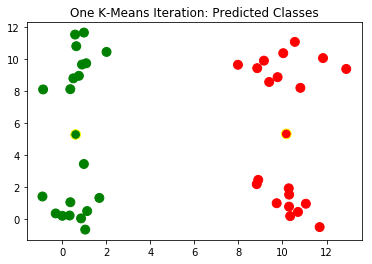

NameError: name 'labels' is not defined

In [6]:
# Exercise 6

def get_labels(X, centroids):
    return np.argmin(np.linalg.norm(X - centroids[:, None], axis=2), axis=0)

def k_means(obs, k_or_guess, iter, thresh):
    
    if type(k_or_guess) is int:
        codebook = np.array(obs[:k_or_guess])
        k = k_or_guess
    else:
        codebook = k_or_guess
        k = k_or_guess.shape[0]
    
    s = 0
    distortion1 = 0
    distortion = 1
    labels = get_labels(obs, codebook)

    while(abs(distortion - distortion1) > thresh):
        distortion1 = distortion
        for j in range(k):
            codebook[j] = np.mean(obs[labels==j], axis=0)
        labels = get_labels(obs, codebook)
        distortion = np.sum(np.linalg.norm(obs - codebook[labels], axis = 1))
        s += 1
        if s == iter:
            break
        
    import matplotlib.pyplot as plt
    plt.scatter(*obs.T, c=np.where(labels, "green", "red"), s=80)
    plt.scatter(*codebook.T, c=["red", "green"], s=95, edgecolor='yellow')
    plt.title('One K-Means Iteration: Predicted Classes')
    plt.show()
    return [codebook, distortion]



obs = np.repeat(np.array([[1,1], [10,1], [1,10], [10,10]]), 10, axis=0)
obs = obs + np.random.randn(*obs.shape)

s = k_means(obs, 2, 100, 1e-5)
import matplotlib.pyplot as plt
plt.scatter(*obs.T, c=np.where(labels, "green", "red"), s=80)
plt.scatter(*codebook.T, c=["red", "green"], s=95, edgecolor='yellow')
plt.title('One K-Means Iteration: Predicted Classes')
plt.show()